In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

## Primer acercamiento con los datos

In [24]:
electric_vehicles = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')
electric_vehicles.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population/data

In [25]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

### Models by Counties

In [26]:
vehicles_by_country = electric_vehicles.groupby('County').agg({'Model': 'count'}).reset_index()
vehicles_by_country

,County,Model
0,Ada,2
1,Adams,49
2,Alameda,4
3,Albemarle,2
4,Alexandria,3
...,...,...
191,Worcester,1
192,Yakima,995
193,Yolo,1
194,York,1


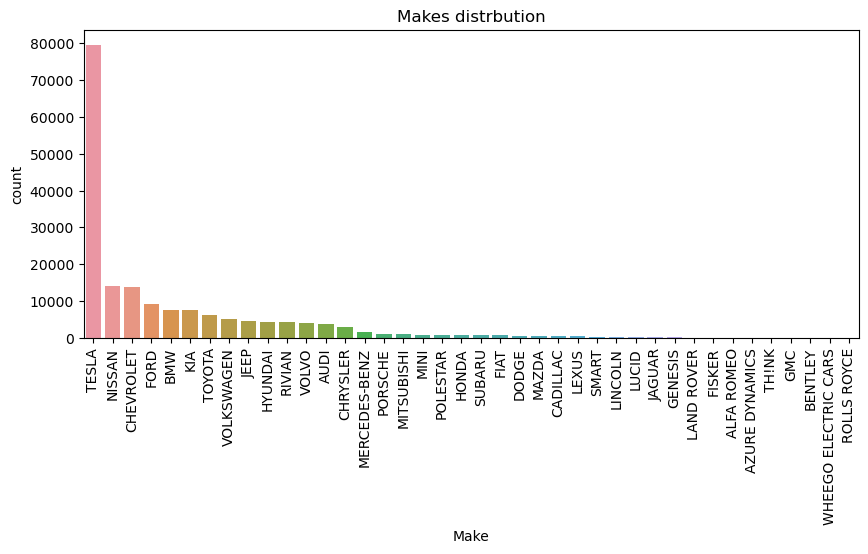

In [27]:
fig = plt.figure(figsize=(10,4))
sns.countplot(data=electric_vehicles, x='Make', order=electric_vehicles['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Makes distrbution')
plt.show()

Podemos observar que **Tesla** es la marca lider en produccion de vehiciulos electricos, ya que la proporcion de cantidad de produccion en comparacion con las demas marcas es muy notable

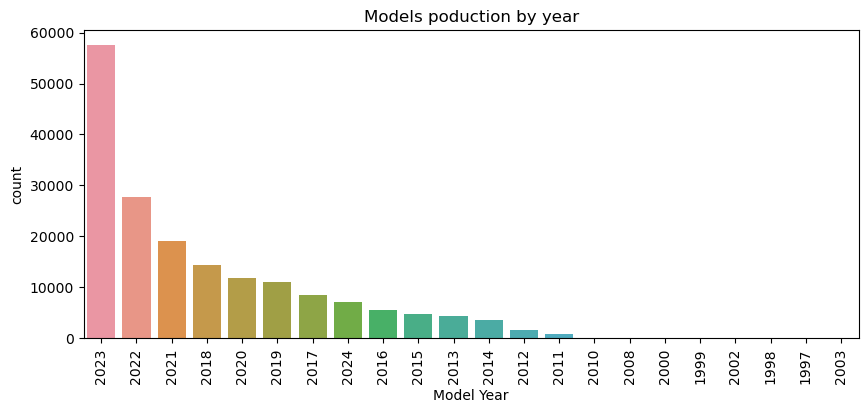

In [28]:
fig = plt.figure(figsize=(10,4))
sns.countplot(data=electric_vehicles, x='Model Year', order=electric_vehicles['Model Year'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Models poduction by year')
plt.show()

In [29]:
electric_vehicles['Model Year'].value_counts().reset_index().sort_values('count', ascending=False)

,Model Year,count
0,2023,57587
1,2022,27776
2,2021,19132
3,2018,14323
4,2020,11768
5,2019,10940
6,2017,8562
7,2024,7080
8,2016,5483
9,2015,4844


La produccion de vehiculos electricos comenzo en el año 1997 y ya a partir del 2011 fue aumentando con el correr de los años, hasta alcanzar su auge en el 2023

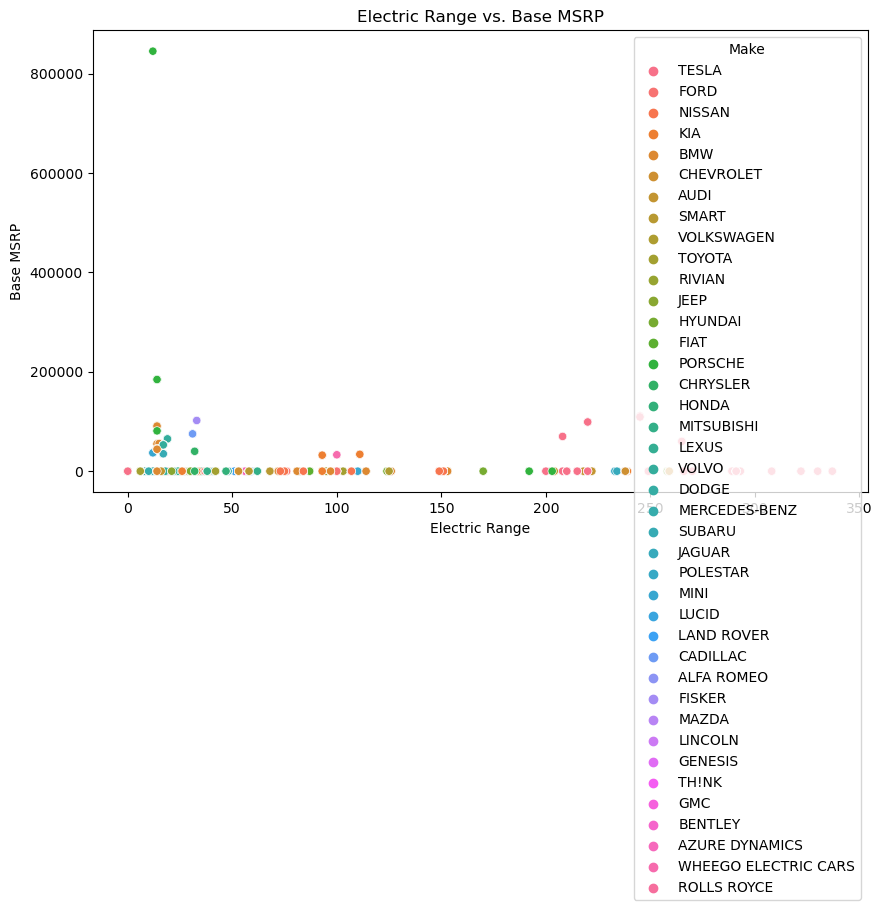

In [30]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=electric_vehicles, x='Electric Range', y='Base MSRP', hue='Make')
plt.title('Electric Range vs. Base MSRP')
plt.show()

In [31]:
electric_vehicles.Make.unique()

array(['TESLA', 'FORD', 'NISSAN', 'KIA', 'BMW', 'CHEVROLET', 'AUDI',
       'SMART', 'VOLKSWAGEN', 'TOYOTA', 'RIVIAN', 'JEEP', 'HYUNDAI',
       'FIAT', 'PORSCHE', 'CHRYSLER', 'HONDA', 'MITSUBISHI', 'LEXUS',
       'VOLVO', 'DODGE', 'MERCEDES-BENZ', 'SUBARU', 'JAGUAR', 'POLESTAR',
       'MINI', 'LUCID', 'LAND ROVER', 'CADILLAC', 'ALFA ROMEO', 'FISKER',
       'MAZDA', 'LINCOLN', 'GENESIS', 'TH!NK', 'GMC', 'BENTLEY',
       'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'ROLLS ROYCE'],
      dtype=object)

In [32]:
electric_vehicles[electric_vehicles.Make == 'TESLA'].Model.unique()

array(['MODEL Y', 'MODEL S', 'MODEL 3', 'MODEL X', 'ROADSTER'],
      dtype=object)

In [33]:
electric_vehicles.value_counts(['Make', 'Model']).reset_index(name='Model_Count')

,Make,Model,Model_Count
0,TESLA,MODEL Y,35989
1,TESLA,MODEL 3,30092
2,NISSAN,LEAF,13366
3,TESLA,MODEL S,7735
4,CHEVROLET,BOLT EV,6821
...,...,...,...
134,BMW,745LE,2
135,BENTLEY,BENTAYGA,1
136,CHEVROLET,S-10 PICKUP,1
137,ROLLS ROYCE,SPECTRE,1
